In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/home/admin1/Downloads/agriculture_dataset.csv")

In [57]:
df

,Temperature,Humidity,Rainfall,Wind_Speed,Soil_Moisture,Soil_pH,Organic_Matter,Crop_Health_Label
0,24.627325,47.240283,7.056089,2.795500,31.010549,6.085810,2.126335,1
1,27.671999,44.408156,14.005230,2.325063,12.429003,6.776880,1.751158,1
2,23.515820,56.268020,46.152684,1.705493,28.454713,6.078783,0.365124,1
3,11.473797,38.637011,15.168736,5.891225,28.450994,6.596315,2.484465,0
4,22.502605,64.438963,9.492281,2.281165,8.295005,7.664008,3.520753,0
...,...,...,...,...,...,...,...,...
212014,19.587977,73.440312,18.110752,3.201326,18.042654,5.841488,2.264188,0
212015,26.948455,75.627371,3.079433,3.852730,27.132598,5.987856,5.504842,1
212016,34.895564,33.174635,44.887436,2.949409,25.674614,6.921040,4.233045,0
212017,21.927317,30.550094,22.895142,5.796982,19.281229,5.766334,5.163089,1


In [58]:
columns_to_remove = [
    "High_Resolution_RGB",
    "Multispectral_Images",
    "Thermal_Images",
    "Temporal_Images",
    "Spatial_Resolution",
    "GPS_Coordinates",
    "Field_Boundaries",
    "Elevation_Data",
    "Canopy_Coverage",
    "NDVI",
    "SAVI",
    "Chlorophyll_Content",
    "Leaf_Area_Index",
    "Crop_Stress_Indicator",
    "Pest_Hotspots",
    "Weed_Coverage",
    "Pest_Damage",
    "Crop_Growth_Stage",
    "Expected_Yield",
    "Crop_Type",
    "Ground_Truth_Segmentation",
    "Bounding_Boxes",
    "Water_Flow",
    "Drainage_Features"
    
]

# Drop columns (safe even if some columns are missing)
df = df.drop(columns=columns_to_remove, errors="ignore")

In [59]:
df

,Temperature,Humidity,Rainfall,Wind_Speed,Soil_Moisture,Soil_pH,Organic_Matter,Crop_Health_Label
0,24.627325,47.240283,7.056089,2.795500,31.010549,6.085810,2.126335,1
1,27.671999,44.408156,14.005230,2.325063,12.429003,6.776880,1.751158,1
2,23.515820,56.268020,46.152684,1.705493,28.454713,6.078783,0.365124,1
3,11.473797,38.637011,15.168736,5.891225,28.450994,6.596315,2.484465,0
4,22.502605,64.438963,9.492281,2.281165,8.295005,7.664008,3.520753,0
...,...,...,...,...,...,...,...,...
212014,19.587977,73.440312,18.110752,3.201326,18.042654,5.841488,2.264188,0
212015,26.948455,75.627371,3.079433,3.852730,27.132598,5.987856,5.504842,1
212016,34.895564,33.174635,44.887436,2.949409,25.674614,6.921040,4.233045,0
212017,21.927317,30.550094,22.895142,5.796982,19.281229,5.766334,5.163089,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212019 entries, 0 to 212018
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Temperature        212019 non-null  float64
 1   Humidity           212019 non-null  float64
 2   Rainfall           212019 non-null  float64
 3   Wind_Speed         212019 non-null  float64
 4   Soil_Moisture      212019 non-null  float64
 5   Soil_pH            212019 non-null  float64
 6   Organic_Matter     212019 non-null  float64
 7   Crop_Health_Label  212019 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 12.9 MB


In [61]:
df.describe()

,Temperature,Humidity,Rainfall,Wind_Speed,Soil_Moisture,Soil_pH,Organic_Matter,Crop_Health_Label
count,212019.000000,212019.000000,212019.000000,212019.000000,212019.000000,212019.000000,2.120190e+05,212019.000000
mean,24.988813,60.026018,20.000650,1.996279,20.036496,6.501125,1.989095e+00,0.698985
std,4.998123,17.300364,19.950327,1.409332,8.657071,0.500949,1.981186e+00,0.458701
min,2.683095,30.000070,0.000108,0.002633,5.000124,4.266919,9.941814e-07,0.000000
25%,21.618165,45.077182,5.755815,0.960508,12.560251,6.164453,5.751914e-01,0.000000
50%,24.983795,60.049335,13.855487,1.677287,20.062687,6.502296,1.382120e+00,1.000000
75%,28.363127,74.972133,27.688246,2.686233,27.543781,6.839389,2.760928e+00,1.000000
max,46.783110,89.999833,299.939332,15.104049,34.999900,8.627347,2.713456e+01,1.000000


In [62]:
df.isnull().sum()

Temperature          0
Humidity             0
Rainfall             0
Wind_Speed           0
Soil_Moisture        0
Soil_pH              0
Organic_Matter       0
Crop_Health_Label    0
dtype: int64

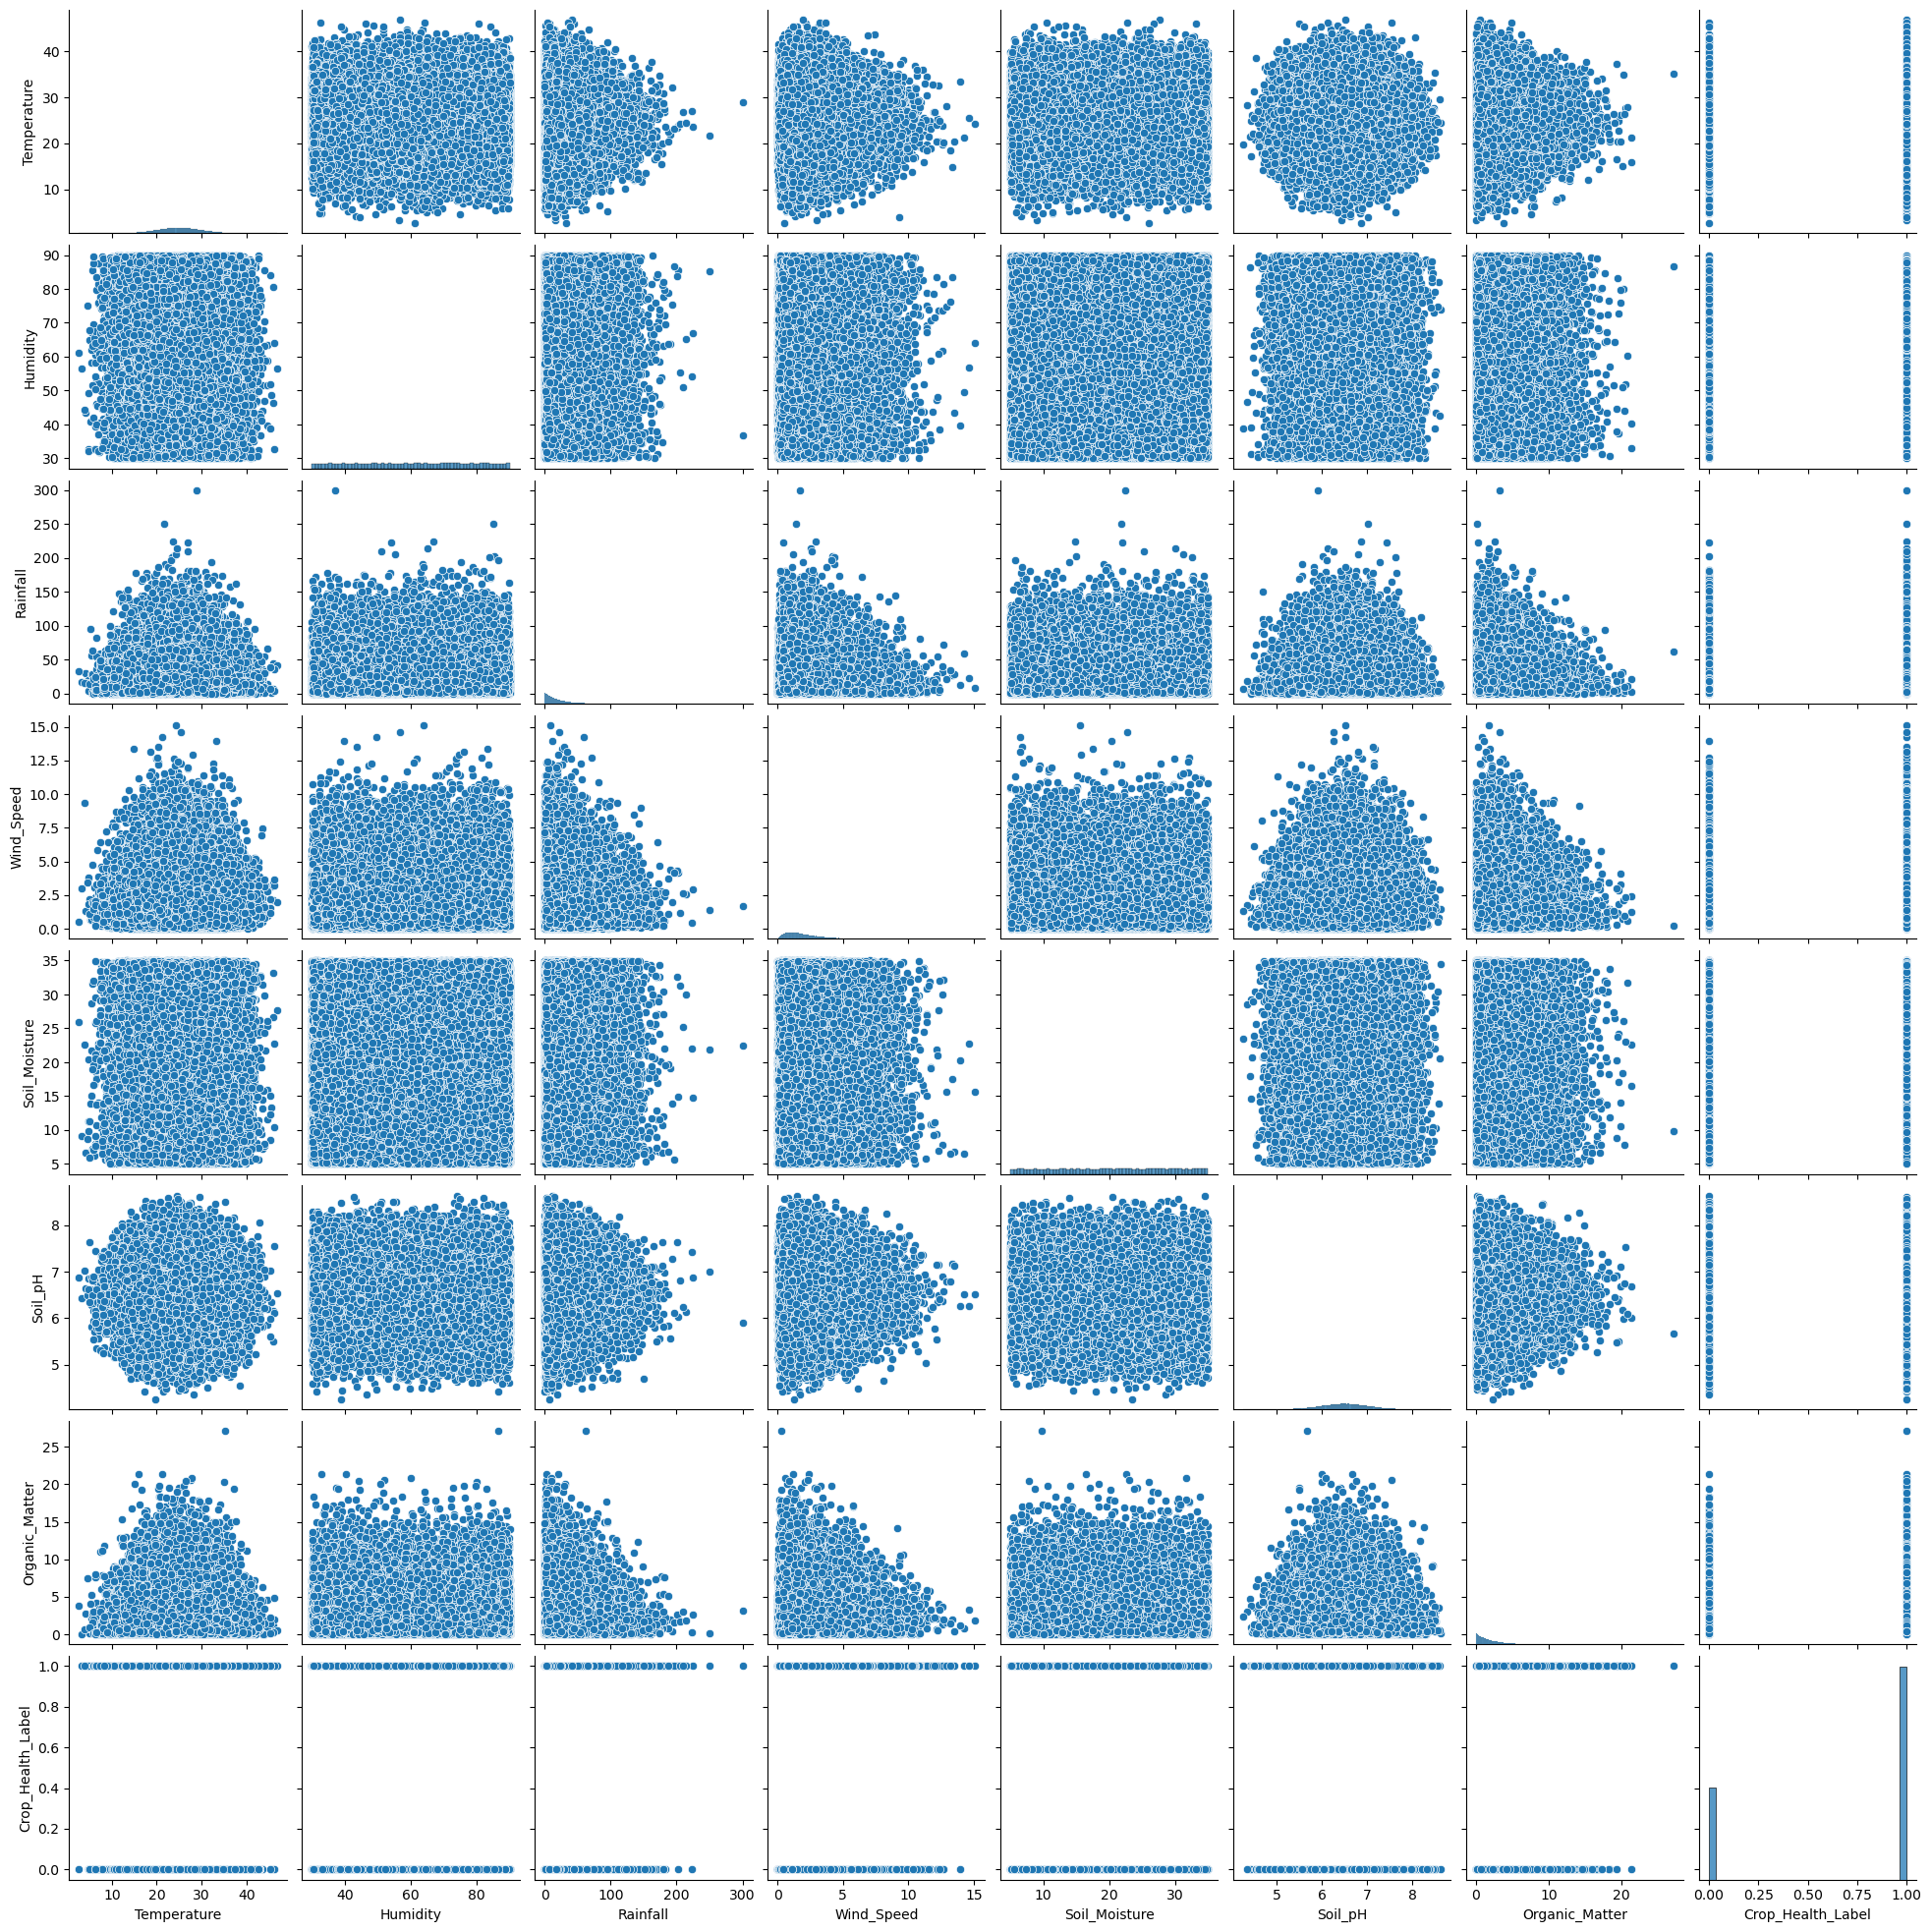

In [63]:
sns.pairplot(df)

In [50]:
x = df[['Temperature', 'Humidity', 'Rainfall', 'Wind_Speed',
        'Soil_Moisture', 'Soil_pH', 'Organic_Matter']]
y=df['Crop_Health_Label']

In [52]:
x

,Temperature,Humidity,Rainfall,Wind_Speed,Soil_Moisture,Soil_pH,Organic_Matter
0,24.627325,47.240283,7.056089,2.795500,31.010549,6.085810,2.126335
1,27.671999,44.408156,14.005230,2.325063,12.429003,6.776880,1.751158
2,23.515820,56.268020,46.152684,1.705493,28.454713,6.078783,0.365124
3,11.473797,38.637011,15.168736,5.891225,28.450994,6.596315,2.484465
4,22.502605,64.438963,9.492281,2.281165,8.295005,7.664008,3.520753
...,...,...,...,...,...,...,...
212014,19.587977,73.440312,18.110752,3.201326,18.042654,5.841488,2.264188
212015,26.948455,75.627371,3.079433,3.852730,27.132598,5.987856,5.504842
212016,34.895564,33.174635,44.887436,2.949409,25.674614,6.921040,4.233045
212017,21.927317,30.550094,22.895142,5.796982,19.281229,5.766334,5.163089


In [54]:
y

0         1
1         1
2         1
3         0
4         0
         ..
212014    0
212015    1
212016    0
212017    1
212018    0
Name: Crop_Health_Label, Length: 212019, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.8 , random_state = 42)

In [73]:
x_train

,Temperature,Humidity,Rainfall,Wind_Speed,Soil_Moisture,Soil_pH,Organic_Matter
195995,28.940186,45.201551,5.406865,1.516985,24.023945,7.023351,1.095819
72203,32.444790,73.125579,23.909745,2.209522,24.585768,6.871041,2.237224
27226,35.619776,67.853717,6.446129,2.246277,21.300859,6.439130,0.872306
148852,17.070794,32.030950,12.340444,0.377128,25.698706,4.922503,4.007248
77353,31.478310,44.315194,11.384057,1.179293,17.173498,5.967427,1.691805
...,...,...,...,...,...,...,...
119879,24.391294,75.823831,7.452418,0.692271,9.762662,6.377403,0.262109
103694,30.201537,81.139003,0.476367,4.177781,34.092722,6.918688,0.972242
131932,28.674910,65.043077,8.357243,1.031876,27.610828,6.455006,0.664278
146867,21.266153,38.237844,18.969034,1.340084,8.184599,6.824822,1.864622


In [75]:
y_train

195995    1
72203     0
27226     1
148852    0
77353     1
         ..
119879    0
103694    0
131932    1
146867    0
121958    1
Name: Crop_Health_Label, Length: 169615, dtype: int64

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
model_LR = LogisticRegression()

In [81]:
model_LR

LogisticRegression()

In [83]:
model_LR.fit(x_train,y_train)

LogisticRegression()

In [85]:
y_pred_LR = model_LR.predict(x_test)

In [87]:
y_pred_LR

array([1, 1, 1, ..., 1, 1, 1])

In [89]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [93]:
import warnings 
warnings.filterwarnings('ignore')

In [95]:
accuracy_LR = accuracy_score(y_test , y_pred_LR)
cr = classification_report(y_test , y_pred_LR)
cm = confusion_matrix(y_test , y_pred_LR)

In [97]:
print("Accuracy_Score Of Logistics Regression is:",accuracy_LR)

Accuracy_Score Of Logistics Regression is: 0.7010187718139799


In [99]:
cm

array([[    0, 12678],
       [    0, 29726]])

In [101]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12678
           1       0.70      1.00      0.82     29726

    accuracy                           0.70     42404
   macro avg       0.35      0.50      0.41     42404
weighted avg       0.49      0.70      0.58     42404



In [103]:
from sklearn.naive_bayes import GaussianNB

In [105]:
model_GNB = GaussianNB()

In [107]:
model_GNB

GaussianNB()

In [109]:
model_GNB.fit(x_train,y_train)

GaussianNB()

In [111]:
y_pred_GNB = model_GNB.predict(x_test)

In [113]:
y_pred_GNB

array([1, 1, 1, ..., 1, 1, 1])

In [115]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [117]:
accuracy_GNB = accuracy_score(y_test , y_pred_GNB)
cr = classification_report(y_test , y_pred_GNB)
cm = confusion_matrix(y_test , y_pred_GNB)

In [119]:
accuracy_GNB

0.7010187718139799

In [121]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12678
           1       0.70      1.00      0.82     29726

    accuracy                           0.70     42404
   macro avg       0.35      0.50      0.41     42404
weighted avg       0.49      0.70      0.58     42404



In [123]:
cm

array([[    0, 12678],
       [    0, 29726]])

In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [127]:
model

RandomForestClassifier()

In [129]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
y_pred = model.predict(x_test)

In [131]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [132]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [133]:
accuracy = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)
cm = confusion_matrix(y_test , y_pred)

In [134]:
accuracy

0.6983539288746344

In [135]:
print(cr)

              precision    recall  f1-score   support

           0       0.29      0.01      0.01     12678
           1       0.70      0.99      0.82     29726

    accuracy                           0.70     42404
   macro avg       0.50      0.50      0.42     42404
weighted avg       0.58      0.70      0.58     42404



In [136]:
cm

array([[   78, 12600],
       [  191, 29535]])

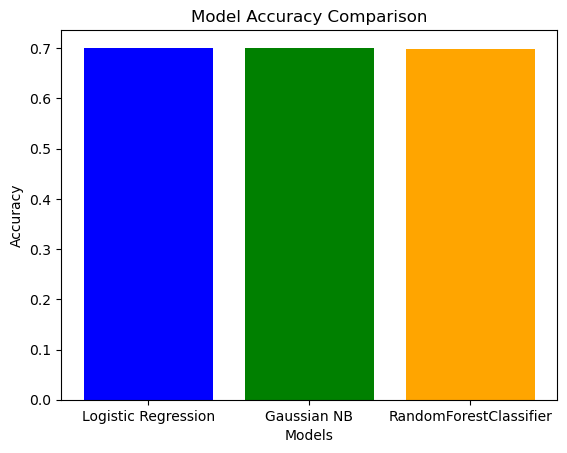

In [145]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Gaussian NB', 'RandomForestClassifier']
accuracies = [accuracy_LR, accuracy_GNB, accuracy]

colors = ['blue', 'green', 'orange']

plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()